# 1a + 1d

In [1]:
import numpy
import matplotlib.pyplot as plt
import time

In [2]:
# A function that returns dependent values based on input independent values and a list containing the coefficents 
# for each term in the polynomial. This will work for any n-degree polynomial, as it creates the polynomial based 
# on how many coeficients are specified.
def generate_poly(x, coef):
    val = 0
    for i in range(0,len(coef)):
        val += coef[i] * (x ** i)
    return val

In [3]:
x_max = 4
x_min = -4
num_points = 10000

dx = (x_max - x_min) / num_points

coef = [1.80,-4.05,0.4,1.0]

x_vals = numpy.arange(x_min, x_max, dx)
y_vals = generate_poly(x_vals, coef)

x_roots = []
points_per_slice = 1000
num_iterations = num_points/points_per_slice

start = time.time()
y_left = y_vals[0]


# Loop over the slices.
for i in range(1, int(num_iterations)):
    y_right = y_vals[points_per_slice*i]
    
    # Check if our slice border is a root.
    if (y_right == 0):
        print('Found root at x = ' + str(x_vals[points_per_slice*i]))
        x_roots.append(x_vals[points_per_slice*i])

    # Otherwise, check to see if there is a root somewhere in the slice. If there is, use bisection to find it.
    elif (y_left * y_right < 0.):
        x_low = x_vals[points_per_slice*(i-1)]
        x_high = x_vals[points_per_slice*i]

        # Difine how close to the root we need to be before saying we found it.
        epsilon = 1.48E-8
        y_check = 1

        while (y_check > epsilon):
            x_mid = (x_high + x_low) / 2.
            y_check = abs(generate_poly(x_mid, coef))

            # Figure out which side of the new interval contains the root, and re-define the interval accordingly.
            if (generate_poly(x_low, coef) * generate_poly(x_mid, coef) < 0.):
                x_high = x_mid
            else:
                x_low = x_mid
        
        print('Found root at x = ' + str(round(x_mid, 6)) + '\n')
        x_roots.append(round(x_mid, 6))
        
    y_left = y_right

# Depending on the slice size there may be a small left over slice with less than the normal amount of points.
# We still need to check that partial slice for roots.
y_right = y_vals[len(y_vals) - 1]

if (y_right == 0):
    print('Found root at x = ' + str(x_vals[len(x_vals) - 1]))
    x_roots.append(x_vals[len(x_vals) - 1])
    
elif (y_left * y_right < 0.):
    # There are some index shenanigins here becuase numpy.where annoyingly returns a tuple instead of an integer...
    x_low = x_vals[numpy.argwhere(y_vals == y_left)[0][0]]
    x_high = x_vals[len(x_vals) - 1]

    epsilon = 1.48E-8
    y_check = 1

    while (y_check > epsilon):
        x_mid = (x_high + x_low) / 2.
        y_check = abs(generate_poly(x_mid, coef))
        if (generate_poly(x_low, coef) * generate_poly(x_mid, coef) < 0.):
            x_high = x_mid
        else:
            x_low = x_mid
        
    print('Found root at x = ' + str(round(x_mid, 6)) + '\n')
    x_roots.append(round(x_mid, 6))
end = time.time()

print('Total number of roots found = ' + str(len(x_roots)))
print('Time taken to calcuate = ' + str(end - start) + 's.')

Found root at x = -2.4

Found root at x = 0.5

Found root at x = 1.5

Total number of roots found = 3
Time taken to calcuate = 0.0011446475982666016s.


# 1b

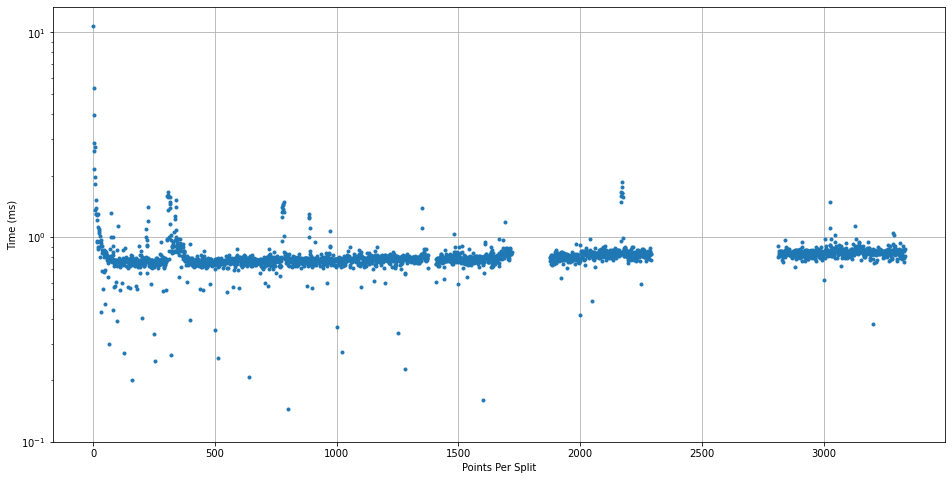

In [4]:
x_max = 4
x_min = -4
num_points = 10000

dx = (x_max - x_min) / num_points

coef = [1.80,-4.05,0.4,1.0]
num_roots_expected = 3

x_vals = numpy.arange(x_min, x_max, dx)
y_vals = generate_poly(x_vals, coef)

computation_times = []
failed_indicies = []
point_range = numpy.arange(1, int(num_points/2))

# This time we are looping over many different points_per_slice so that we can compare their computation times.
# The algorith is the same from 1a+1d with one minor change at the end with how the data is stored.
for points_per_slice in point_range:
    x_roots = []
    num_iterations = num_points/points_per_slice
    
    start = time.time()
    y_left = y_vals[0]

    for i in range(1, int(num_iterations)):
        y_right = y_vals[points_per_slice*i]
    
        if (y_right == 0):
            x_roots.append(x_vals[points_per_slice*i])

        elif (y_left * y_right < 0.):
            x_low = x_vals[points_per_slice*(i-1)]
            x_high = x_vals[points_per_slice*i]

            epsilon = 1.48E-8
            y_check = 1

            while (y_check > epsilon):
                x_mid = (x_high + x_low) / 2.
                y_check = abs(generate_poly(x_mid, coef))

                if (generate_poly(x_low, coef) * generate_poly(x_mid, coef) < 0.):
                    x_high = x_mid
                else:
                    x_low = x_mid
        
            x_roots.append(round(x_mid, 6))
        y_left = y_right

    y_right = y_vals[len(y_vals) - 1]

    if (y_right == 0):
        print('Found root at x = ' + str(x_vals[len(x_vals) - 1]))
        x_roots.append(x_vals[len(x_vals) - 1])
    
    elif (y_left * y_right < 0.):
        x_low = x_vals[numpy.argwhere(y_vals == y_left)[0][0]]
        x_high = x_vals[len(x_vals) - 1]

        epsilon = 1.48E-8
        y_check = 1

        while (y_check > epsilon):
            x_mid = (x_high + x_low) / 2.
            y_check = abs(generate_poly(x_mid, coef))
            if (generate_poly(x_low, coef) * generate_poly(x_mid, coef) < 0.):
                x_high = x_mid
            else:
                x_low = x_mid

        x_roots.append(round(x_mid, 6))

    end = time.time()
    # If we found all the roots then we append the computation time. However, if we did not find all the roots then
    # we note the index so that we can remove that value from the plot_domain when we go to plot.
    if (len(x_roots) == num_roots_expected) :
      computation_times.append((end-start) * 1000)
    else:
      failed_indicies.append(numpy.where(point_range == points_per_slice))
    
# Plot the results.
plot_domain = numpy.delete(point_range, failed_indicies)
plt.figure(figsize=(16,8))
plt.plot(plot_domain, computation_times, '.')
plt.yscale('log')
plt.ylabel('Time (ms)')
plt.xlabel('Points Per Split')
plt.ylim(bottom=0.1)
plt.grid()
plt.show()


# 1c


Overall this plot looks as expected. There is some sort of exponential decay for the initial ~20 points, which should be expected as these trials have too much granularity. After 20 points per split the data is fairly linear (and it wouldn't be that hard to do a linear regression to prove that). Of note are the three gaps, around 1400,1750, and 2500 respectivly. After some digging, the cause of these gaps is apparent. In all of these cases the number of points in each slice is causing one of the slices to contain both of the later roots. Thus, the y-values on both sides of the slice are positive and the algorithm moves on to the next slice. While this is a flaw with the algorithm it is easliy solved by choosing a different number of points, or number of points per slice. The last point on the plot is also expected as 3,333. Any more points per slice than this and there are only 2 slices to find 3 roots.


# 2a

In [1]:
import numpy
import pandas as pd
from io import StringIO 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# I have removed the first data point (with a negative altitude) as we are fitting with a sqrt and I think that using
# imaginary numbers is probably not the point of this exercise.
data = StringIO('Altitude,Density\n0,1.225\n1000,1.112\n2000,1.007\n3000,0.9093\n4000,0.8194\n5000,0.7364\n6000, \
                 0.6601\n7000,0.59\n8000,0.5258\n9000,0.4671\n10000,0.4135\n15000,0.1948\n20000,0.08891\n25000, \
                 0.04008\n30000,0.01841\n40000,0.003996\n50000,0.001027\n60000,0.0003097\n70000,0.00008283\n80000, \
                 0.00001846')
df = pd.read_csv(data)

# 2b

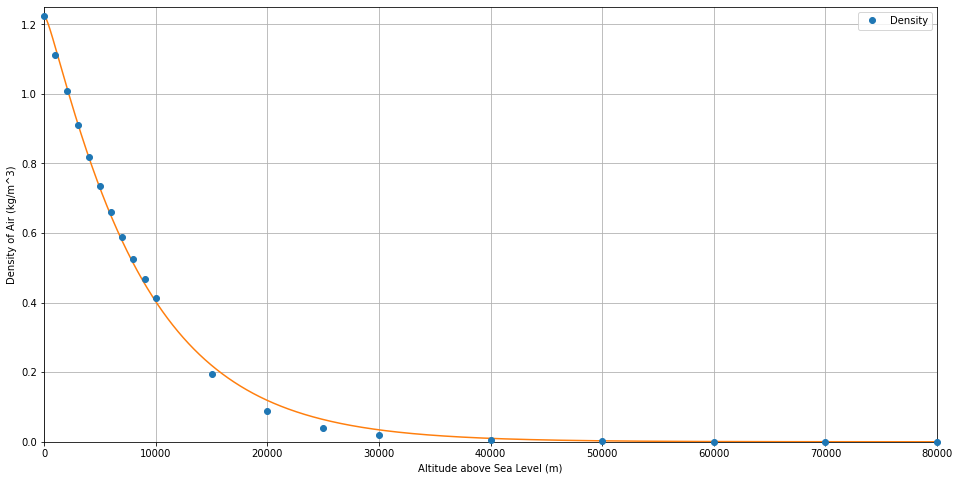

In [2]:
def fitfunction(x,*coef):
    return coef[0] * numpy.exp(coef[1] * x + coef[2] * numpy.sqrt(x))

init_vals = [0.0 for x in range(3)]
x = numpy.array(df['Altitude'])
y = numpy.array(df['Density'])
popt, pcov = curve_fit(fitfunction, x, y, p0=init_vals)

x_vals = numpy.array(numpy.linspace(0.,80000, 100000))
y_vals = fitfunction(x_vals, popt[0], popt[1], popt[2])


df.plot('Altitude','Density',style='o',figsize=(16,8), zorder=10, clip_on=False)
plt.grid()
plt.margins(0)
plt.ylim(0,1.25)
plt.plot(x_vals, y_vals)
plt.ylabel('Density of Air (kg/m^3)')
plt.xlabel('Altitude above Sea Level (m)')
plt.show()

# 2c

In [3]:
def fitfunction(x,*coef):
    return coef[0] * numpy.exp(coef[1] * x + coef[2] * numpy.sqrt(x))

init_vals = [0.0 for x in range(3)]
x = numpy.array(df['Altitude'])
y = numpy.array(df['Density'])
popt, pcov = curve_fit(fitfunction, x, y, p0=init_vals)

# Calculate the standard deviations from the covariance matrix
std_dev = numpy.sqrt(numpy.diag(pcov))

# Print the results.
print('A = ' + str(popt[0]) + '\u00B1' + str(std_dev[0]))
print('B = ' + str(popt[1]) + '\u00B1' + str(std_dev[1]))
print('C = ' + str(popt[2]) + '\u00B1' + str(std_dev[2]))

A = 1.2102474181686913±0.015015493930935087
B = -0.00013061287871011195±5.239846559397795e-06
C = 0.002063425447332031±0.0005212600939451014


# 2d

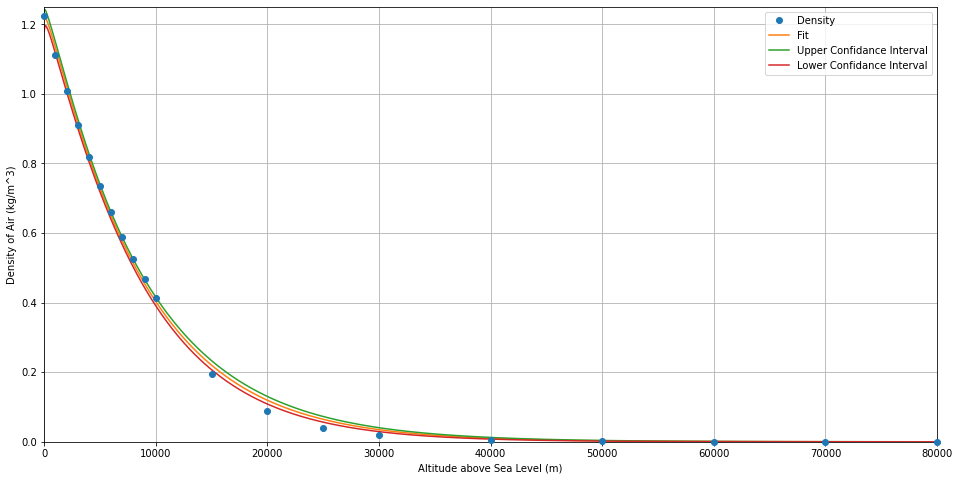

In [4]:
def fitfunction(x,*coef):
    return coef[0] * numpy.exp(coef[1] * x + coef[2] * numpy.sqrt(x))

init_vals = [0.0 for x in range(3)]
x = numpy.array(df['Altitude'])
y = numpy.array(df['Density'])
popt, pcov = curve_fit(fitfunction, x, y, p0=init_vals)

xi = numpy.linspace(0,80000,1000)
ps = numpy.random.multivariate_normal(popt, pcov, 10000)
y_sample = numpy.asarray([fitfunction(xi,*pi) for pi in ps])
lower_interval = numpy.percentile(y_sample, 2.5, axis=0)
upper_interval = numpy.percentile(y_sample, 97.5, axis=0)
fit = (lower_interval + upper_interval) / 2.0

df.plot('Altitude','Density',style='o',figsize=(16,8), zorder=10, clip_on=False)
plt.grid()
plt.margins(0)
plt.ylim(0,1.25)
plt.ylabel('Density of Air (kg/m^3)')
plt.xlabel('Altitude above Sea Level (m)')
plt.plot(xi,fit,label='Fit')
plt.plot(xi,upper_interval,label='Upper Confidance Interval')
plt.plot(xi,lower_interval, label='Lower Confidance Interval')
plt.legend()
plt.show()


Overall I am not super pleased with this fit. Near the extrema (less than 10,000m and greater than 50,000m) the fit is quite good with all the points landing on or within the 95% confidance region. However, in the middle region, the fit is not so good. My initial thoughs are that trying to fit this data with a single equation isn't the best idea. Our atmosphere is not a continium and has different layers with different physical properties. According to NASA the lowest layer of our atmosphere, the Troposphere, extends to somewhere between 8 and 14km above sea level. After this layer comes the Stratosphere which extends till about 50km. This is intersting because all the data points that seem to lie outside our 95% confidance interval are in the Stratosphere. The Stratosphere is unique from the other layers of our atmosphere in that it contains the Ozone layer. So I don't think it unreasonable to think that maybe we need to model the Stratosphere with a different equation due to its different physical properties. 